------------------------------------------------------------------------------------------
| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  |  Combining posterior estimates|
| Notes | Ad Example: Probability of Success of Ad Campaign| 
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 05/29/20 |
-------------------------------------------------------------------------------------------

In [1]:
# Import librarires
import numpy as np
import pandas as pd
import plotnine as pn
import scipy.stats as sc

# Plot configurations
pn.options.figure_size = (10,2)
pn.options.dpi = 125# Import librarires

In [2]:
### Helper function ###

### Beta probability ###
beta_prob = lambda theta, a, b: sc.beta.pdf(theta,a, b)

In [3]:
### Posterior ###
n_sims = 30000
np.random.seed(123)

# Observed values
X = 5
n = 10

# Prior values
alpha_1 = 3; beta_1 = 12
alpha_2 = 4 ; beta_2 = 8

# Prior weightings
weight_1 = 2/3
weight_2 = 1/3

# Posterior values
alpha_prime_1 = alpha_1 + X; beta_prime_1 = beta_1 + n - X
alpha_prime_2 = alpha_2 + X; beta_prime_2 = beta_2 + n - X

# Sampling from the posterior
theta_given_x_range = np.arange(0,1,0.01)
theta_given_x_1 = beta_prob(theta_given_x_range, alpha_prime_1, beta_prime_1)
theta_given_x_2 = beta_prob(theta_given_x_range, alpha_prime_2, beta_prime_2)

# Probability distribution of theta_given_x
theta_given_x = weight_1 * theta_given_x_1+\
                weight_2 * theta_given_x_2

# Sampling from the combined posterior
p_normalized_density = theta_given_x/theta_given_x.sum()
theta_given_x_sample = np.random.choice(a = theta_given_x_range, p = p_normalized_density, size = n_sims)


In [4]:
### Posterior distribution ###
pr_ctr_greater_than_03 = np.round(np.mean(theta_given_x_sample>0.3),2)
print('CTR: Pr(theta>0.3|X)={}'.format(pr_ctr_greater_than_03))

CTR: Pr(theta>0.3|X)=0.64


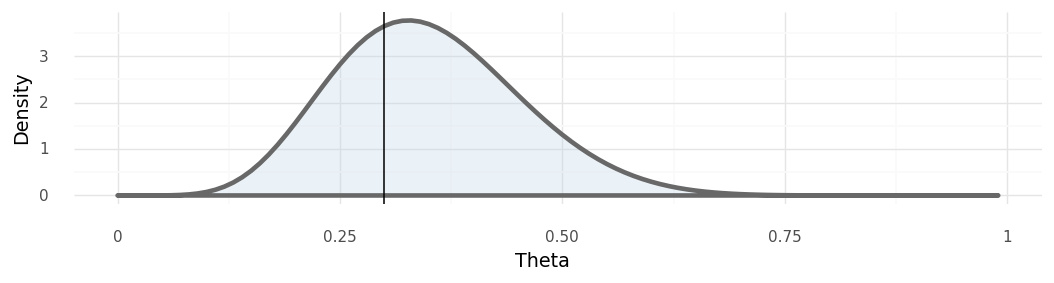

<ggplot: (323751821)>

In [5]:
### Plot 1: Direct ###
theta_df = pd.DataFrame({'theta_given_x_range':theta_given_x_range, 'theta_given_x':theta_given_x})
pn.ggplot(pn.aes(x = 'theta_given_x_range', y = 'theta_given_x'), data = theta_df)\
+ pn.geom_area(fill = '#BED5E5', color = '#686868', size = 1.5, alpha = 0.3)\
+ pn.geom_vline(pn.aes(xintercept = 0.3))\
+ pn.theme_minimal()\
+ pn.ylab('Density')\
+ pn.xlab('Theta')

$$
Pr(\theta>0.3|X)\approx 0.64
$$

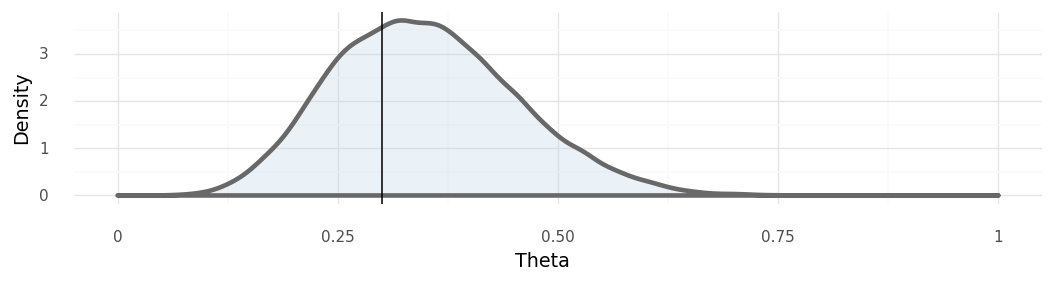

<ggplot: (-9223372036528786232)>

In [6]:
### Plot 2: Using the samples ###
theta_df_2 = pd.DataFrame({'theta_given_x':theta_given_x_sample})

pn.ggplot(pn.aes('theta_given_x'), data = theta_df_2)\
+ pn.geom_density(fill = '#BED5E5', color = '#686868', size = 1.5, alpha = 0.3)\
+ pn.geom_vline(pn.aes(xintercept = 0.3))\
+ pn.theme_minimal()\
+ pn.ylab('Density')\
+ pn.xlab('Theta')\
+ pn.xlim(0,1)